In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import metrics_summary as ms

In [2]:
np.random.seed(170)

In [3]:
X_train = pd.read_csv("data/X_train.csv")
X_test = pd.read_csv("data/X_test.csv")
y_train = pd.read_csv("data/y_train.csv").values.ravel()
y_test = pd.read_csv("data/y_test.csv").values.ravel()

## SMOTE

In [4]:
# implement SMOTE to oversample the minority class
from imblearn.over_sampling import SMOTE
os = SMOTE()
X_os, y_os = os.fit_resample(X_train, y_train)
print(X_os.shape, y_os.shape)

(236866, 251) (236866,)


## Random Forest

[[50498   197]
 [ 5709   333]]
Kappa Score: 0.08563383796292512
Accuracy Score: 0.8959056700213265
Precision: 0.6283018867924528
Recall: 0.055114200595829194
F1 Score: 0.10133901399878271
AUC Score: 0.5256141078923519
Average Accuracy Score: 0.8970586037355659
Average Precision Score: 0.6446823445379833
Average Recall Score: 0.051960461750454934
Average F1 Score: 0.8970586037355659
[0.89674447 0.89734487 0.89783586 0.89692941 0.89643842]
Average AUC Score: 0.8547556226671075
[0.85791533 0.85237638 0.85592019 0.85417738 0.85338883]


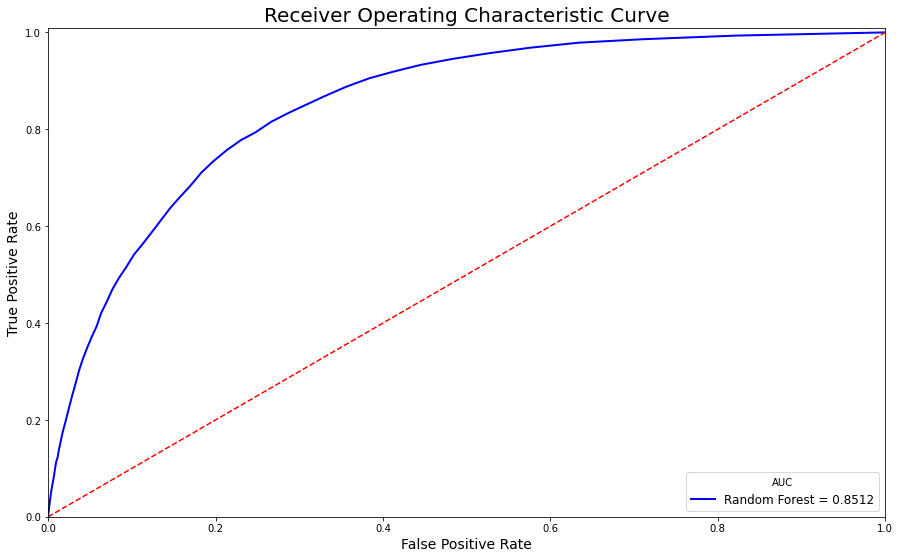

In [5]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
ms.metrics_summary(y_test, y_pred)
ms.crossval_summary(rf, X_train, y_train)
ms.plot_roc(rf, "Random Forest", X_test, y_test)

#### Random Forest Using Cost-Sensitive Learning

[[50490   205]
 [ 5726   316]]
Kappa Score: 0.08075528524367637
Accuracy Score: 0.8954650404497947
Precision: 0.6065259117082533
Recall: 0.05230056272757365
F1 Score: 0.09629742495809843
AUC Score: 0.5241283857133282
Average Accuracy Score: 0.8961672683615284
Average Precision Score: 0.597737965752394
Average Recall Score: 0.04543770362750726
Average F1 Score: 0.8961672683615284
[0.89617796 0.89579635 0.89640065 0.89606073 0.89640065]
Average AUC Score: 0.8596349200232734
[0.86041534 0.85984256 0.86179634 0.85899865 0.85712171]


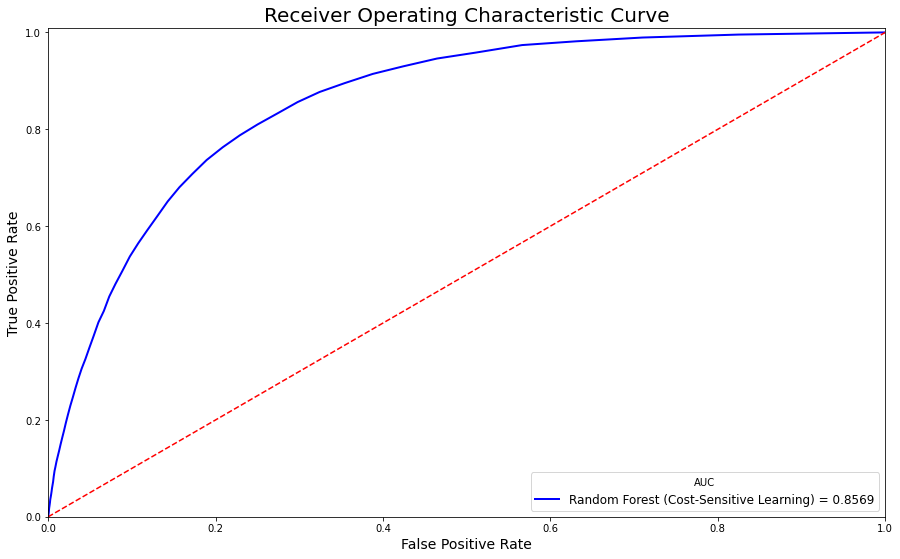

In [6]:
rf_cs = RandomForestClassifier(class_weight="balanced")
rf_cs.fit(X_train, y_train)
y_pred = rf_cs.predict(X_test)
ms.metrics_summary(y_test, y_pred)
ms.crossval_summary(rf_cs, X_train, y_train)
ms.plot_roc(rf_cs, "Random Forest (Cost-Sensitive Learning)", X_test, y_test)

#### Random Forest Using SMOTE

[[50351   344]
 [ 5571   471]]
Kappa Score: 0.11497394987007148
Accuracy Score: 0.895747043375575
Precision: 0.5779141104294478
Recall: 0.07795431976166832
F1 Score: 0.13737786203879246
AUC Score: 0.5355843203503085
Average Accuracy Score: 0.9354961448025956
Average Precision Score: 0.9888844972018068
Average Recall Score: 0.8822645332883017
Average F1 Score: 0.9354961448025956
[0.70566133 0.99297068 0.99284403 0.99273848 0.99326621]
Average AUC Score: 0.9864533322341276
[0.93227724 0.99999648 0.99999705 0.99999802 0.99999788]


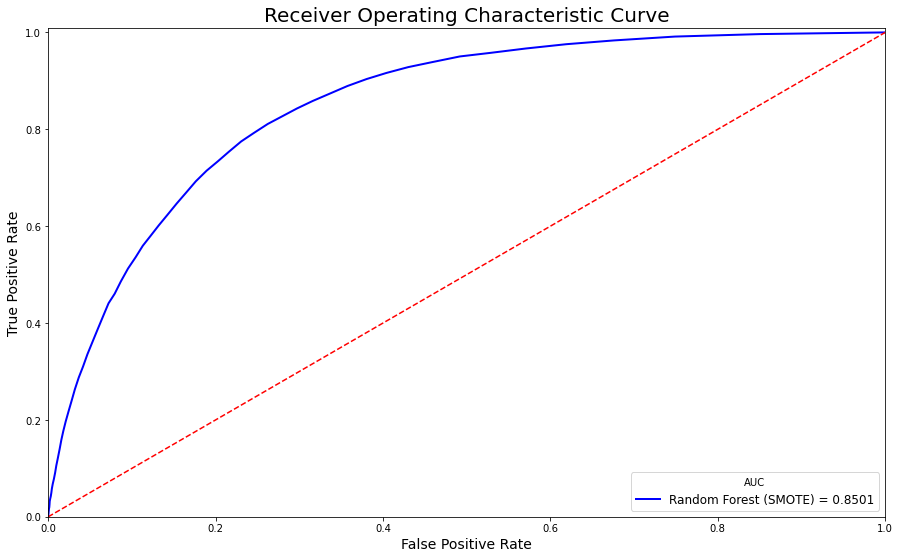

In [7]:
rf_os = RandomForestClassifier()
rf_os.fit(X_os, y_os)
y_pred = rf_os.predict(X_test)
ms.metrics_summary(y_test, y_pred)
ms.crossval_summary(rf_os, X_os, y_os)
ms.plot_roc(rf_os, "Random Forest (SMOTE)", X_test, y_test)

In [8]:
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import GridSearchCV

# n_estimators = [10, 100, 1000, 10000]
# max_features = ['sqrt', 'log2']
# # define grid search
# grid = dict(n_estimators=n_estimators,max_features=max_features)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1)
# grid_search = GridSearchCV(estimator=rf_os, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))